In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

iris_df = sns.load_dataset("iris")
titanic_df = sns.load_dataset("titanic")
ts_df = sns.load_dataset("dowjones")
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Medidas de Tendencia Central

In [2]:
print(f"Promedio de Ancho de Petalo {iris_df['sepal_width'].mean()}")
print(f"Mediana de Largo de Petalo {iris_df['sepal_length'].median()}")

Promedio de Ancho de Petalo 3.0573333333333337
Mediana de Largo de Petalo 5.8


In [3]:
print(f"Moda de Especies: ")
iris_df["species"].mode()

Moda de Especies: 


0        setosa
1    versicolor
2     virginica
Name: species, dtype: object

In [4]:
p25 = iris_df["sepal_width"].quantile(q=0.25)
p50 = iris_df["sepal_width"].quantile(q=0.50)
p75 = iris_df["sepal_width"].quantile(q=0.75)
iris_df["sepal_width"].median(), p25, p50, p75

(3.0, 2.8, 3.0, 3.3)

## Medidas de Dispersión

In [5]:
# Mostrar error en caso de no usar numeric_only
iris_df.var(numeric_only=True, ddof=0)

sepal_length    0.681122
sepal_width     0.188713
petal_length    3.095503
petal_width     0.577133
dtype: float64

In [6]:
iris_df.var(numeric_only=True, ddof=1)

sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
dtype: float64

In [7]:
iris_df.std(numeric_only=True, ddof=1)

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

In [8]:
# Mostrar cómo se construye esta función...
def calculate_quantiles(column):
    quantiles = iris_df.quantile([0.25, 0.75], numeric_only=True)
    iqr_sl = quantiles.loc[0.75, column] - quantiles.loc[0.25, column]
    return iqr_sl


calculate_quantiles("sepal_length")
calculate_quantiles("petal_width")

1.5

In [9]:
iris_df.skew(numeric_only=True)

sepal_length    0.314911
sepal_width     0.318966
petal_length   -0.274884
petal_width    -0.102967
dtype: float64

> Cuando hacemos visualizaciones tenemos 2 formas de hacerlas: 
* Usar Pandas directamente y/o Matplotlib: Buena documentación, gráficos bonitos.
* Usar Seaborn: Documentación Complicada, fácil para descubrir insights.

## Visualizaciones: Pandas

### Histogramas

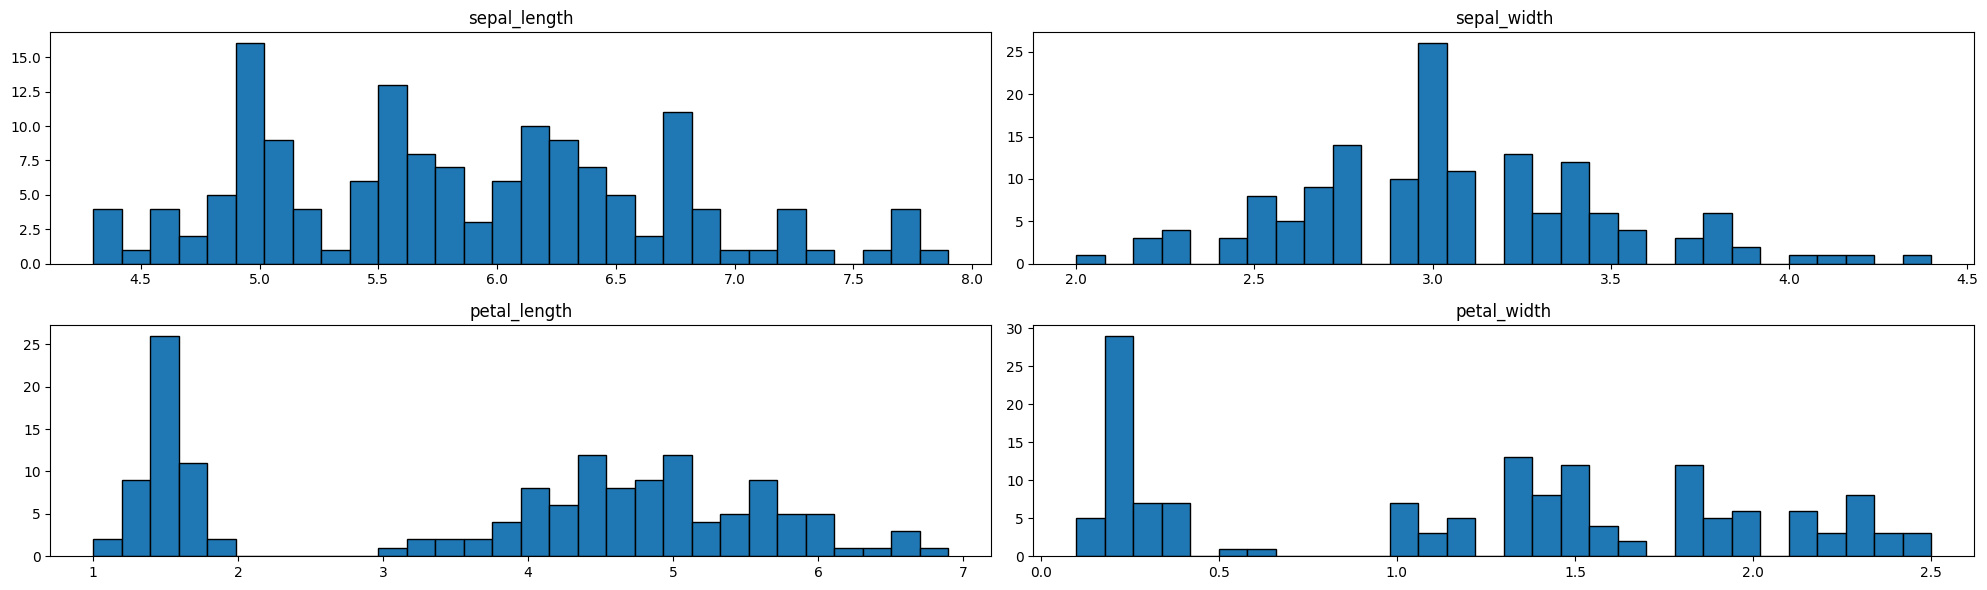

In [10]:
iris_df.hist(figsize=(20, 6), bins=30, edgecolor="black", grid=False)
plt.tight_layout()

<AxesSubplot:ylabel='Frequency'>

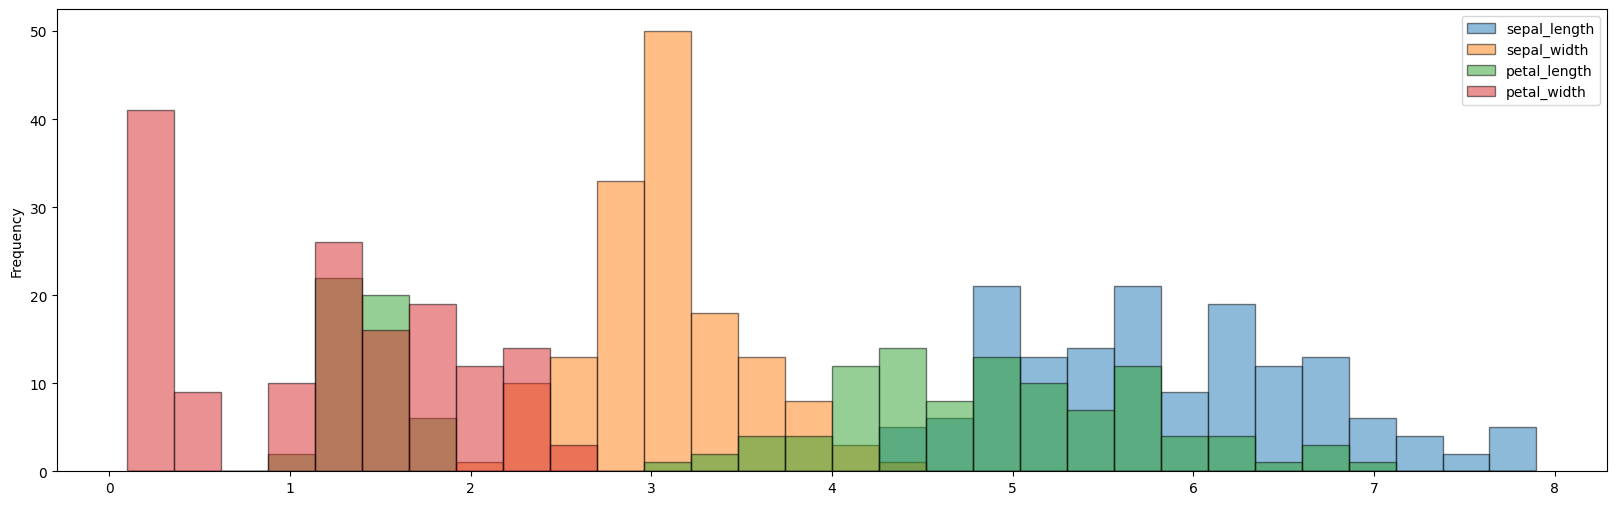

In [11]:
iris_df.plot(
    kind="hist", alpha=0.5, bins=30, figsize=(20, 6), edgecolor="black"
)
# Notar que este genera todos los histogramas super puestos...

### Barplots

<AxesSubplot:title={'center':'Número de Pasajeros por Sexo...'}, xlabel='sex'>

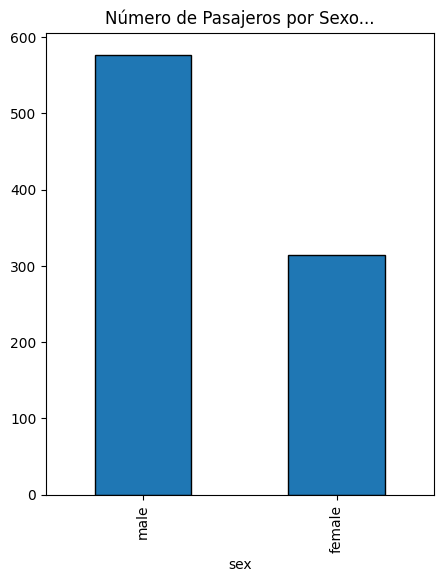

In [12]:
titanic_df["sex"].value_counts().plot(
    kind="bar",
    figsize=(5, 6),
    title="Número de Pasajeros por Sexo...",
    edgecolor="black",
)

> Para este tipo de gráficas se requiere entender el concepto de agrupación...

<AxesSubplot:title={'center':'Edad y Tarifa por cada Clase'}, xlabel='pclass'>

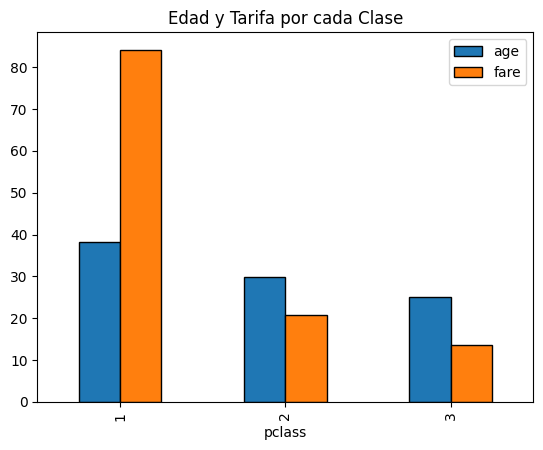

In [13]:
## Gráficar varias dimensiones
titanic_df.groupby("pclass")[["age", "fare"]].mean().plot(
    kind="bar", edgecolor="black", title="Edad y Tarifa por cada Clase"
)

<AxesSubplot:xlabel='species'>

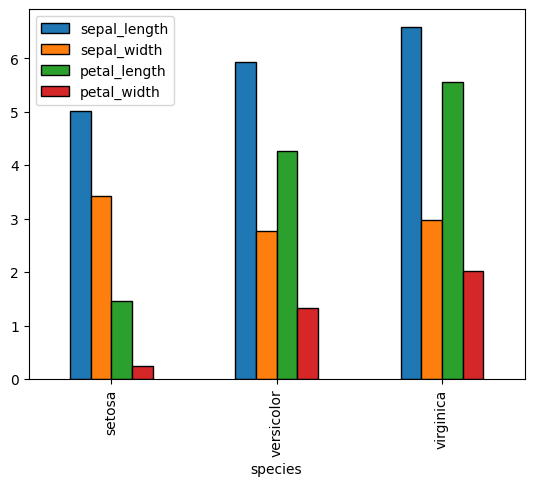

In [14]:
iris_df.groupby("species").mean().plot(kind="bar", edgecolor="black")

## Boxplots

<AxesSubplot:>

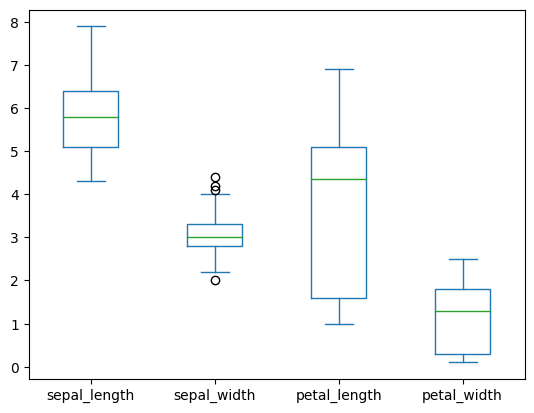

In [15]:
iris_df.drop(columns="species").plot(kind="box")

### Puntos

<AxesSubplot:title={'center':'Largo de Pétalo vs Ancho de Pétalo'}, xlabel='Largo', ylabel='Ancho'>

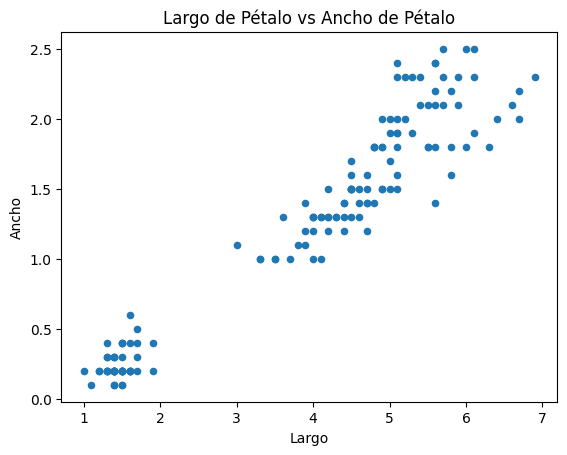

In [16]:
iris_df.plot(
    x="petal_length",
    y="petal_width",
    kind="scatter",
    title="Largo de Pétalo vs Ancho de Pétalo",
    xlabel="Largo",
    ylabel="Ancho",
)

<AxesSubplot:title={'center':'Evolución del Dow Jones'}, xlabel='Date'>

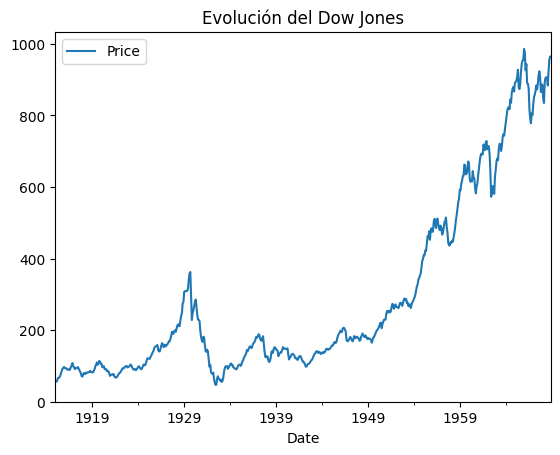

In [17]:
ts_df.plot(x="Date", y="Price", title="Evolución del Dow Jones")

<AxesSubplot:title={'center':'Comparación distintas Tendencias'}, xlabel='Date'>

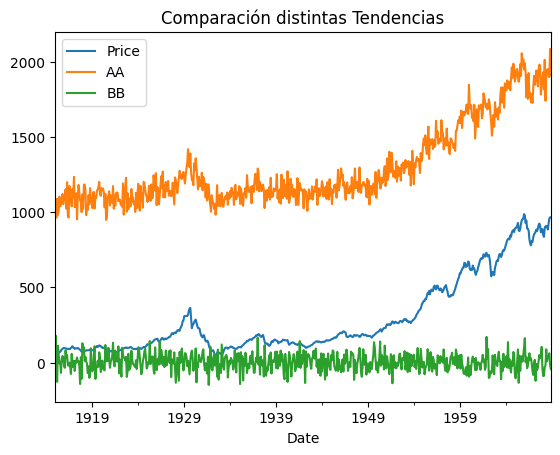

In [18]:
from scipy.stats import norm

ts_df["AA"] = ts_df["Price"] + norm.rvs(size=649) * 55 + 1000
ts_df["BB"] = -norm.rvs(size=649) * 55

ts_df.set_index("Date").plot(title="Comparación distintas Tendencias")

Text(0.5, 0.98, 'Súper Título')

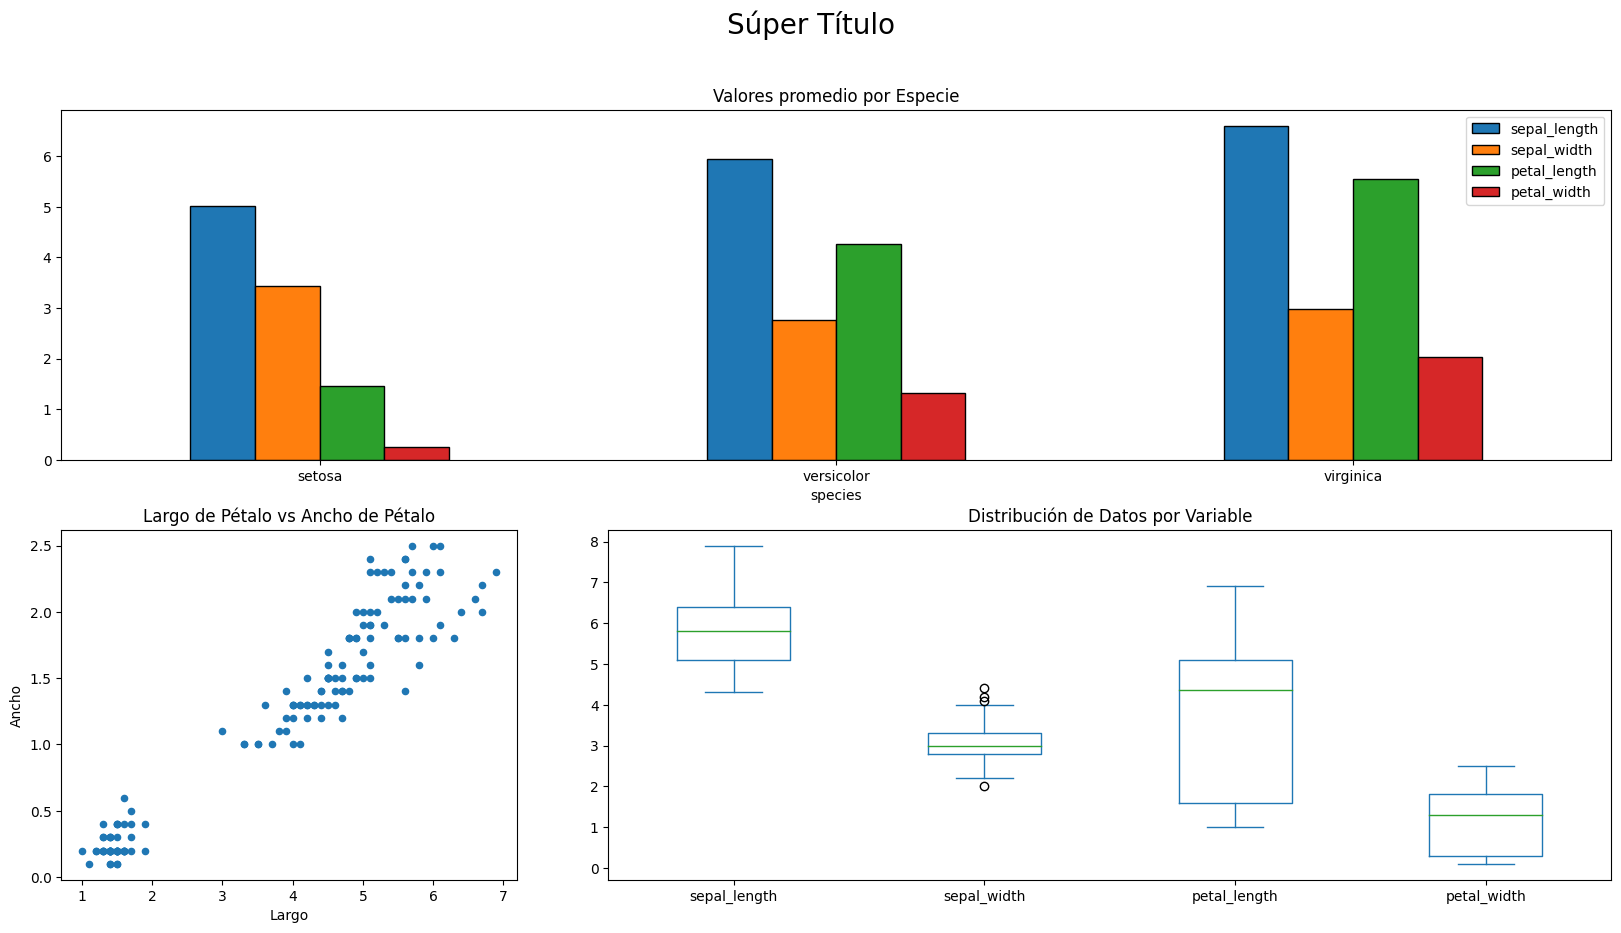

In [19]:
fig = plt.figure(figsize=(20, 10))
ax = fig.subplot_mosaic(
    """AAA
       BCC"""
)

iris_df.drop(columns="species").plot(
    kind="box", ax=ax["C"], title="Distribución de Datos por Variable"
)
iris_df.plot(
    x="petal_length",
    y="petal_width",
    kind="scatter",
    title="Largo de Pétalo vs Ancho de Pétalo",
    xlabel="Largo",
    ylabel="Ancho",
    ax=ax["B"],
)
iris_df.groupby("species").mean().plot(
    kind="bar",
    edgecolor="black",
    ax=ax["A"],
    rot=0,
    title="Valores promedio por Especie",
)
plt.suptitle("Súper Título", fontsize=20)

## Seaborn

Text(0.5, 1.0, 'Pasajeros por Clase')

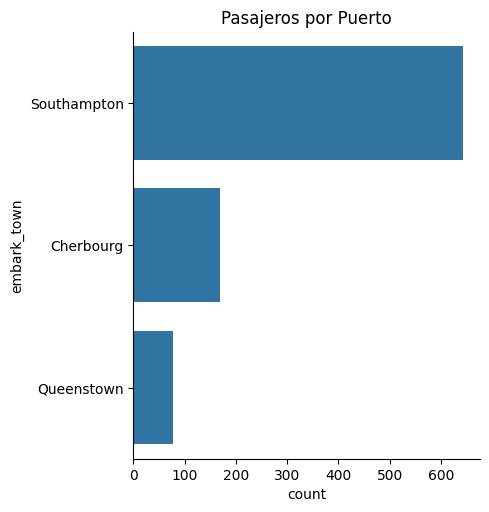

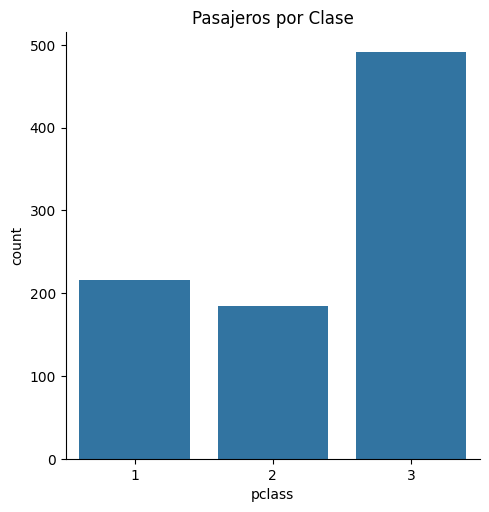

In [20]:
sns.catplot(kind="count", data=titanic_df, y="embark_town")
plt.title("Pasajeros por Puerto")
sns.catplot(kind="count", data=titanic_df, x="pclass")
plt.title("Pasajeros por Clase")

> En el caso de querer entender los colores de Seaborn ver [acá](https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial)

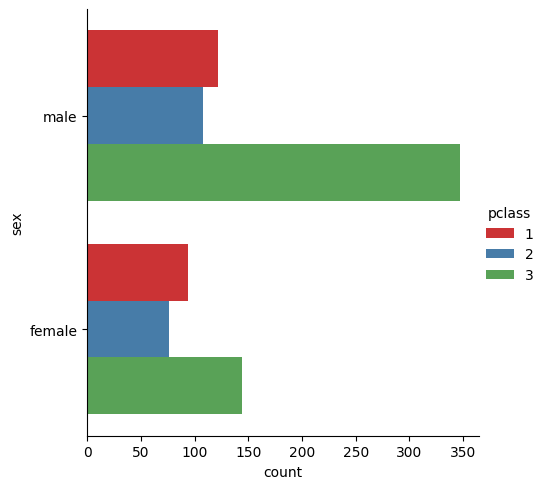

In [21]:
# Agrupar por ambos casos
sns.catplot(
    kind="count", y="sex", hue="pclass", data=titanic_df, palette="Set1"
)

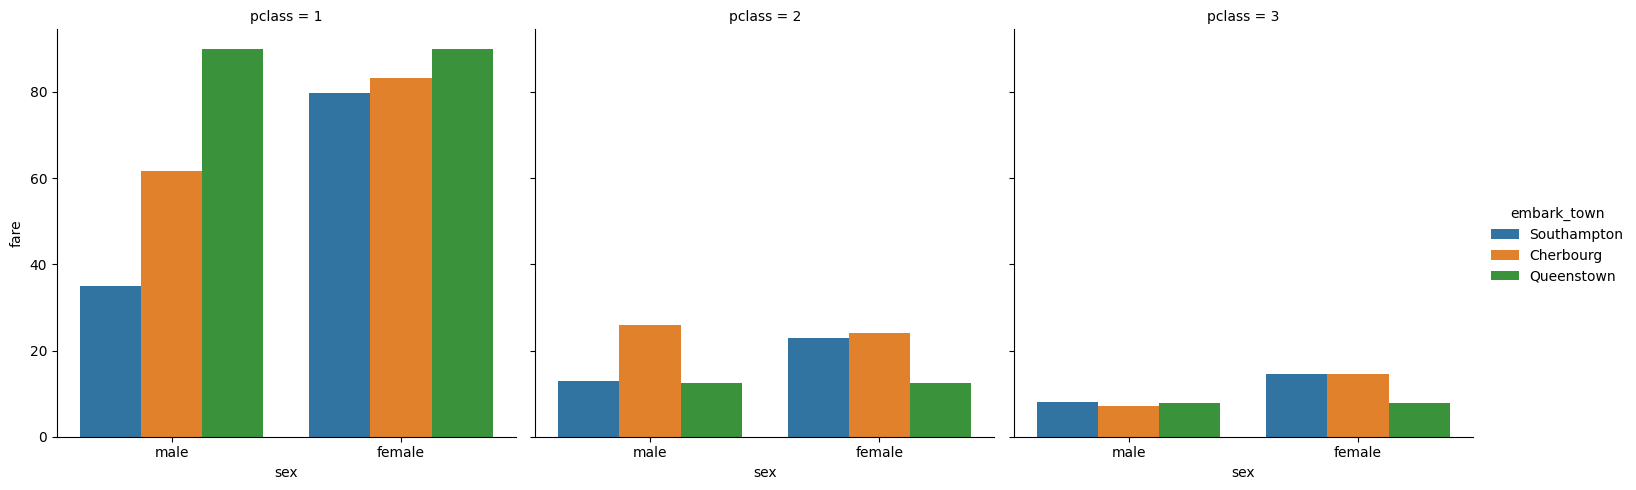

In [22]:
## Barplot
import numpy as np

sns.catplot(
    kind="bar",
    x="sex",
    y="fare",
    data=titanic_df,
    estimator=np.median,
    errorbar=None,
    hue="embark_town",
    col="pclass",
)

### Histogramas

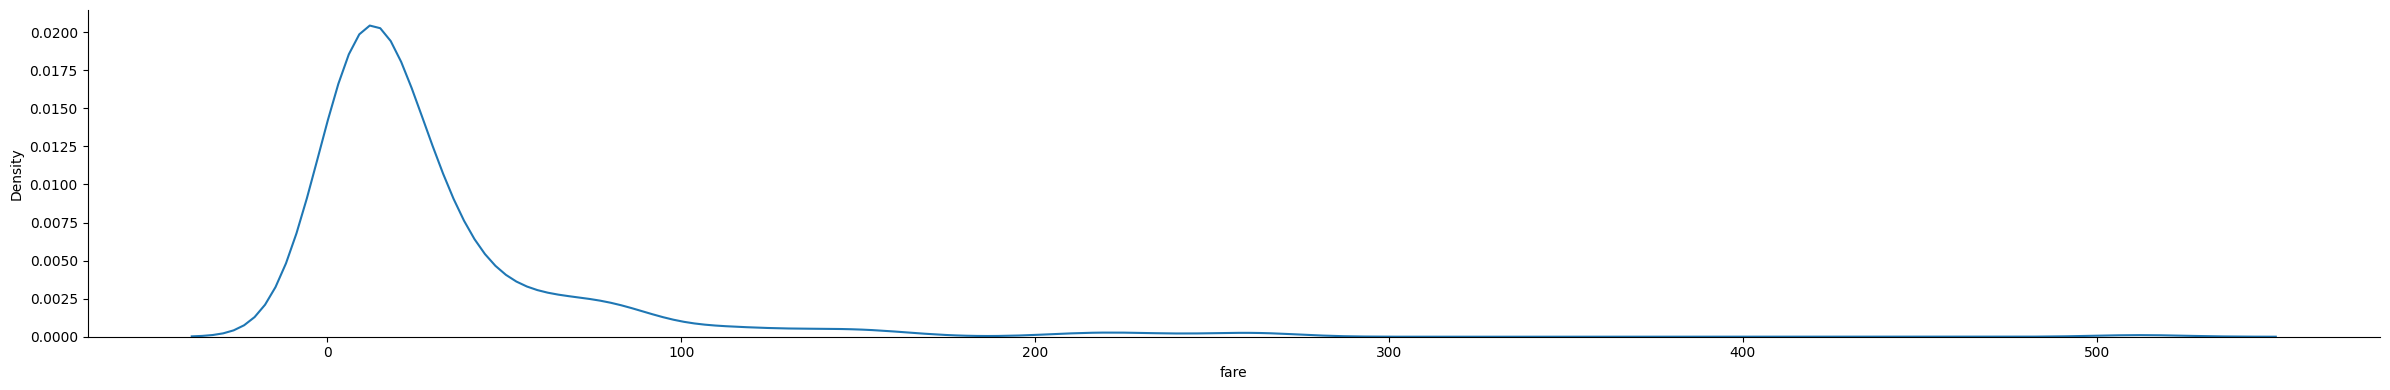

In [23]:
sns.displot(x="fare", data=titanic_df, kind="kde", height=4, aspect=6)

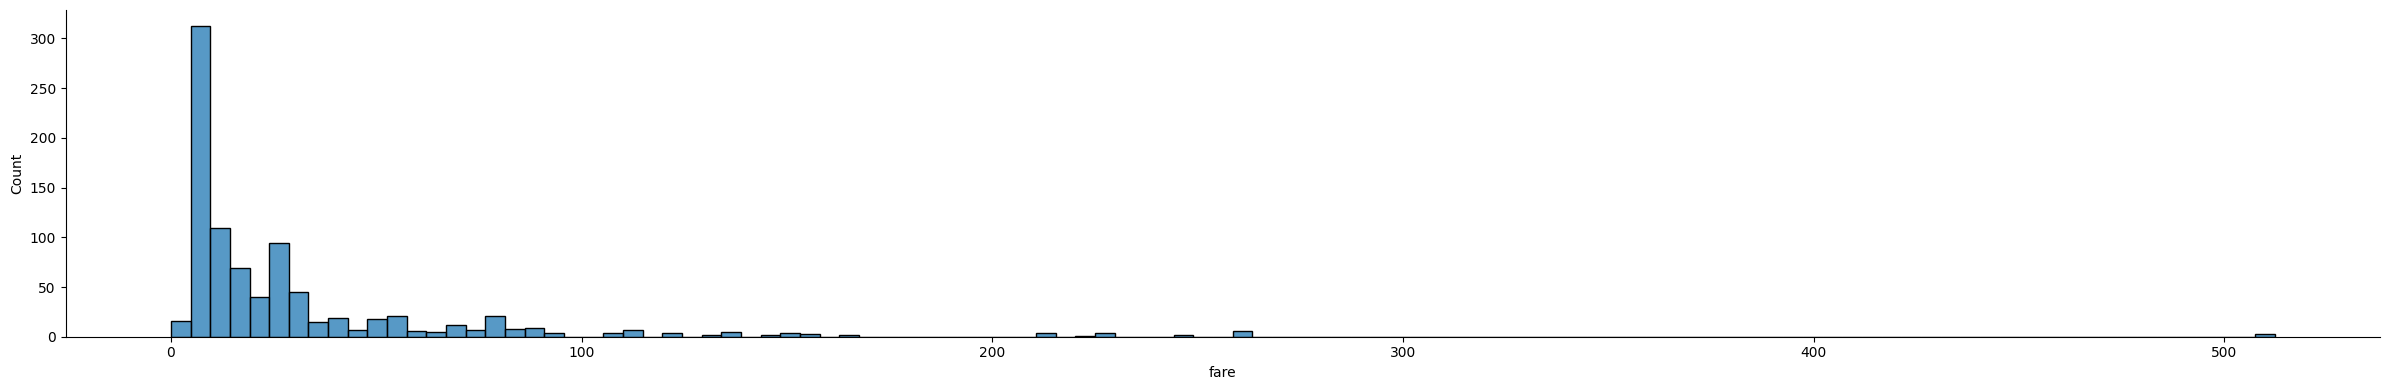

In [24]:
sns.displot(x="fare", data=titanic_df, height=4, aspect=6)

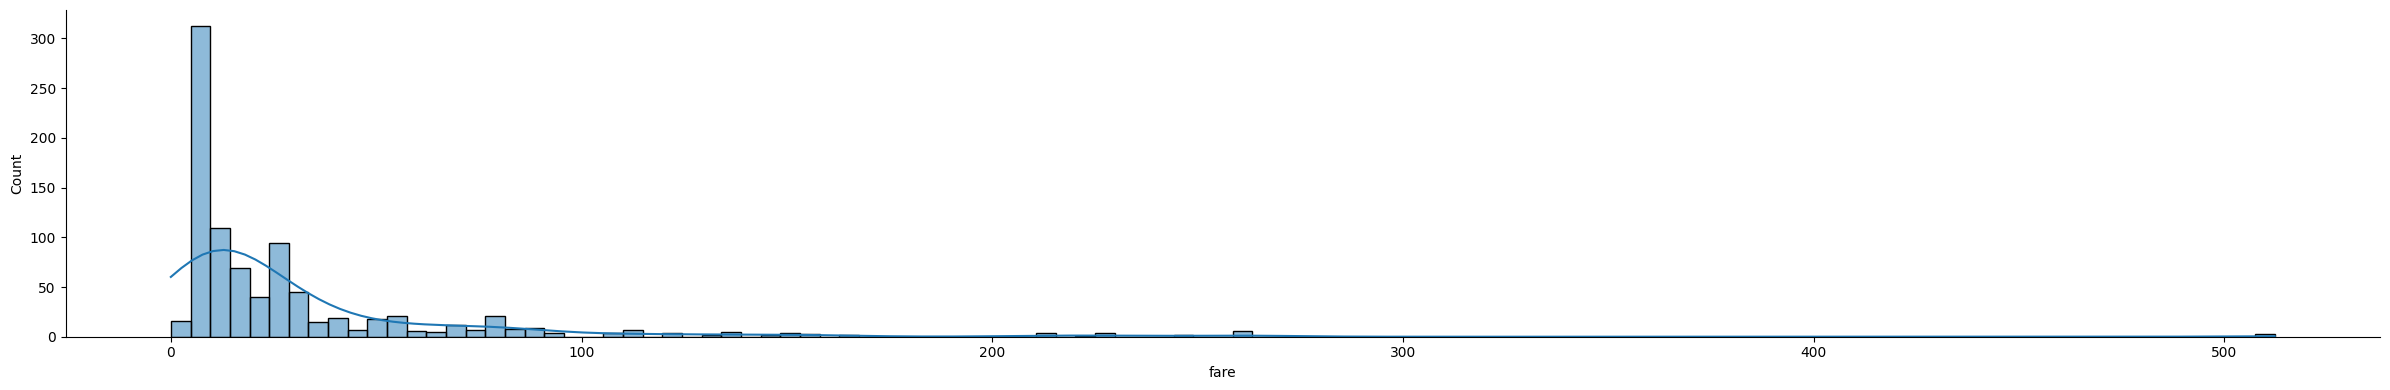

In [25]:
sns.displot(x="fare", data=titanic_df, kde=True, height=4, aspect=6)

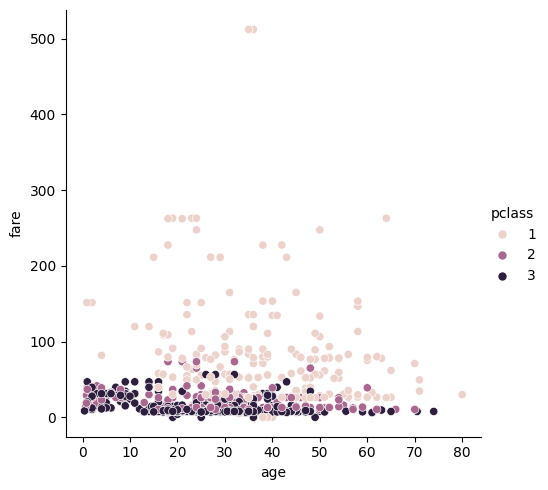

In [26]:
sns.relplot(
    kind="scatter", x="age", y="fare", data=titanic_df, hue="pclass"
)

Text(0.5, 1.0, 'Precio del Dow Jones')

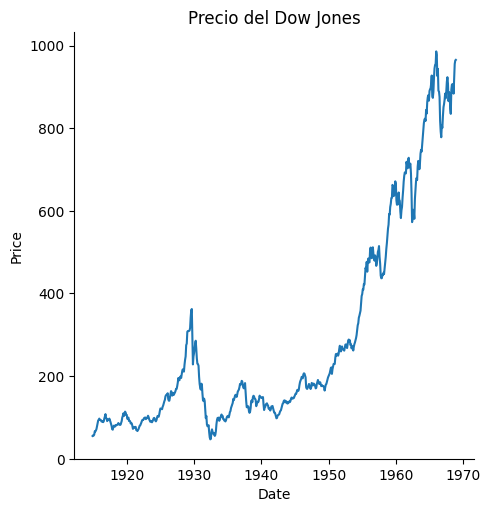

In [27]:
sns.relplot(x="Date", y="Price", data=ts_df, kind="line")
plt.title("Precio del Dow Jones")

In [28]:
new_data = ts_df.melt(
    id_vars=["Date"],
    value_vars=["AA", "BB"],
    var_name="Tipo",
    value_name="stock_price",
)
new_data

,Date,Tipo,stock_price
0,1914-12-01,AA,1108.502557
1,1915-01-01,AA,1047.266778
2,1915-02-01,AA,962.881350
3,1915-03-01,AA,1087.728331
4,1915-04-01,AA,981.036020
...,...,...,...
1293,1968-08-01,BB,36.633113
1294,1968-09-01,BB,40.238166
1295,1968-10-01,BB,61.388597
1296,1968-11-01,BB,-16.274181


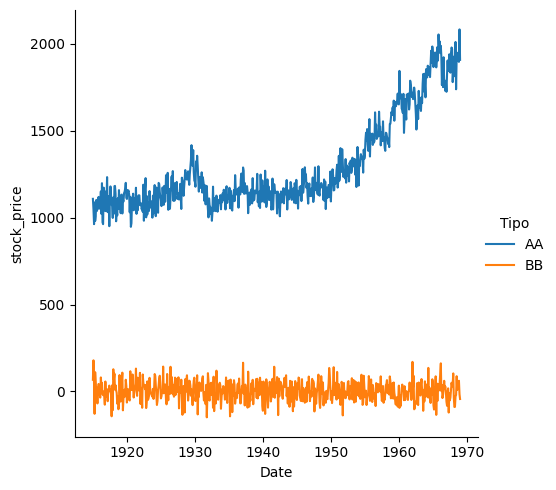

In [29]:
sns.relplot(
    kind="line", y="stock_price", x="Date", data=new_data, hue="Tipo"
)

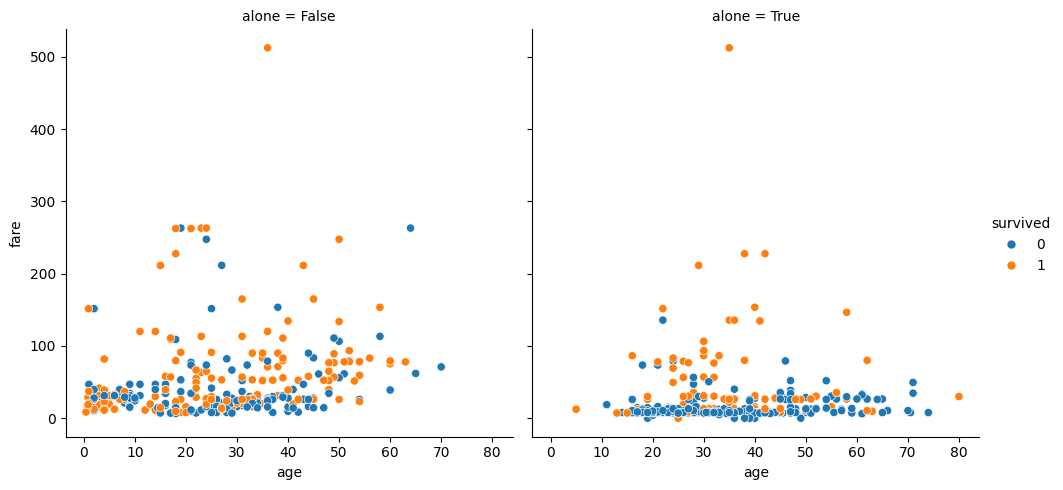

In [30]:
sns.relplot(
    kind="scatter",
    x="age",
    y="fare",
    data=titanic_df,
    col="alone",
    hue="survived",
)

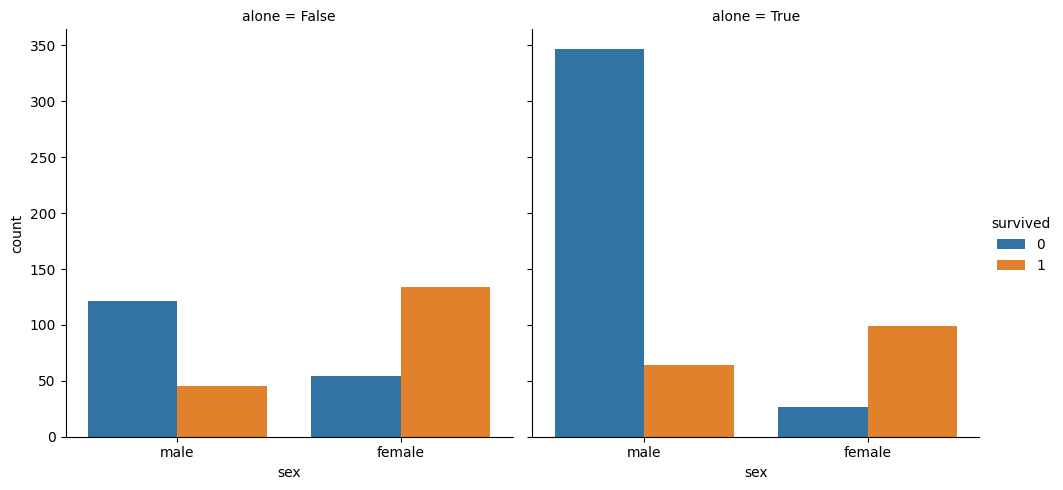

In [31]:
# Esto es un insight... Los hombres solos sobrevivieron muchísimo más...
sns.catplot(
    kind="count", x="sex", hue="survived", data=titanic_df, col="alone"
)

> El contra de estos gráficos en Seaborn es que no permiten agregarse a un `Layout Mosaic`.